<a target="_blank" href="https://colab.research.google.com/github/paulotguerra/QXD0178/blob/main/03.01-Mineracao-de-Dados-Agrupamentos.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## QXD0178 - Mineração de Dados
# Tarefas de Mineração de Dados: Agrupamentos

**Professor:** Paulo de Tarso Guerra Oliveira ([paulodetarso@ufc.br](mailto:paulodetarso@ufc.br))

Adaptado de: [*Python Data Science Handbook*](https://jakevdp.github.io/PythonDataScienceHandbook/index.html)


### Categorias de aprendizado de máquina

O aprendizado de máquina pode ser categorizado em dois tipos principais: aprendizado supervisionado e aprendizado não supervisionado.


A **aprendizagem supervisionada** envolve de alguma forma modelar a relação entre características medidas dos dados e algum rótulo associado aos dados; uma vez determinado este modelo, ele pode ser usado para aplicar rótulos a dados novos e desconhecidos. 

Isto é subdividido em tarefas de **classificação** e tarefas de **regressão**: na classificação, os rótulos são categorias discretas, enquanto na regressão, os rótulos são quantidades contínuas.





A **aprendizagem não supervisionada** envolve modelar as características de um conjunto de dados sem referência a qualquer rótulo e é frequentemente descrita como "deixar o conjunto de dados falar por si".  Esses modelos incluem tarefas de **agrupamento** e de **redução de dimensionalidade**. 

Os algoritmos de agrupamento identificam grupos distintos de dados, enquanto os algoritmos de redução de dimensionalidade procuram representações mais sucintas dos dados. 



Além disso, existem os chamados métodos de **aprendizado semi-supervisionado**, que ficam em entre o aprendizado supervisionado e o não supervisionada. Os métodos de aprendizagem semissupervisionados costumam ser úteis quando apenas rótulos incompletos estão disponíveis.

## Agrupamentos: associações entre observações

Até agora, vimos estimadores de aprendizagem supervisionada: aqueles estimadores que prevêem rótulos com base em dados de treinamento rotulados. Aqui começamos a examinar vários estimadores não supervisionados, que podem destacar aspectos interessantes dos dados sem referência a quaisquer rótulos conhecidos.

Os algoritmos de agrupamento procuram aprender, a partir das propriedades dos dados, uma divisão ótima ou rotulagem discreta de grupos de pontos.

Muitos algoritmos de clustering estão disponíveis, mas talvez o mais simples de entender seja um algoritmo conhecido como *k-means clustering*, que é implementado em `sklearn.cluster.KMeans`.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## k-Means

O algoritmo *k-means* procura um número predeterminado de clusters dentro de um conjunto de dados multidimensional não rotulado. Ele consegue isso usando uma concepção simples de como seria o cluster ideal:
- O “centro do cluster” é a média aritmética de todos os pontos pertencentes ao cluster.
- Cada ponto está mais próximo do seu próprio centro de cluster do que de outros centros de cluster.

Essas duas suposições são a base do modelo *k-means*. Vamos dar uma olhada em um conjunto de dados simples e ver o resultado do *k-means*.

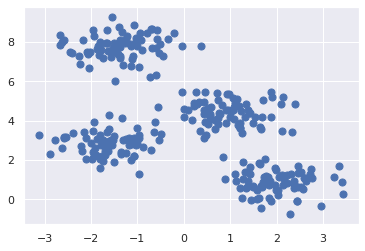

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

É relativamente fácil intuitivamente distinguir os quatro clusters. 

O algoritmo *k-means* faz isso automaticamente e no Scikit-Learn usa a API típica do estimador:

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Vamos visualizar os resultados plotando os dados coloridos por esses rótulos. 
Também representaremos graficamente os centros do cluster conforme determinado pelo estimador k -means:

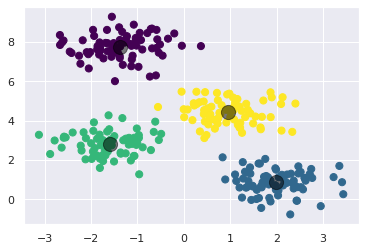

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

A boa notícia é que o algoritmo *k-means* (pelo menos neste caso simples) atribui os pontos aos clusters de forma muito semelhante à forma como poderíamos atribuí-los a olho nu. 

Você pode estar se perguntando como esse algoritmo encontra esses clusters tão rapidamente, afinal, o número de combinações possíveis de atribuições de cluster é exponencial no número de pontos de dados – uma pesquisa exaustiva seria muito, muito cara. 

Felizmente para nós, uma pesquisa tão exaustiva não é necessária: em vez disso, a abordagem típica para *k-means* envolve uma abordagem iterativa intuitiva conhecida como **maximização de expectativas**.

### Algoritmo de Maximização de Expectativas

A maximização de expectativas (Expectation–Maximization, ou E-M) é um algoritmo poderoso que surge em uma variedade de contextos na ciência de dados. O *k-means* é uma aplicação do algoritmo particularmente simples e fácil de entender, que resumindo, consiste no seguinte procedimento:

1. Tente adivinhar centros de cluster
2. Repita até convergir
   1. *E-Step*: atribuir pontos ao centro do cluster mais próximo
   2. *M-Step*: defina os centros do cluster para a média


Aqui, o "E-step" ou "Etapa de Expectativa" é chamado assim porque envolve a atualização de nossa expectativa de qual cluster cada ponto pertence. O "M-step" ou "etapa de maximização" é assim chamada porque envolve a maximização de alguma função de *fitness* que define a localização dos centros do cluster -- neste caso, essa maximização é realizada tomando uma média simples dos dados em cada cluster.

Em circunstâncias típicas, cada repetição do passo E e do passo M sempre resultará em uma melhor estimativa das características do cluster.

In [5]:
from ipywidgets import interact
from sklearn.metrics import pairwise_distances_argmin

def plot_kmeans_interactive(min_clusters=1, max_clusters=6):
    X, y = make_blobs(n_samples=300, centers=4,
                      random_state=0, cluster_std=0.60)
        
    def plot_points(X, labels, n_clusters):
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis',
                    vmin=0, vmax=n_clusters - 1);
            
    def plot_centers(centers):
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c=np.arange(centers.shape[0]),
                    s=200, cmap='viridis')
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c='black', s=50)
            

    def _kmeans_step(frame=0, n_clusters=4):
        rng = np.random.RandomState(2)
        labels = np.zeros(X.shape[0])
        centers = rng.randn(n_clusters, 2)

        nsteps = frame // 3

        for i in range(nsteps + 1):
            old_centers = centers
            if i < nsteps or frame % 3 > 0:
                labels = pairwise_distances_argmin(X, centers)

            if i < nsteps or frame % 3 > 1:
                centers = np.array([X[labels == j].mean(0)
                                    for j in range(n_clusters)])
                nans = np.isnan(centers)
                centers[nans] = old_centers[nans]

        # plot the data and cluster centers
        plot_points(X, labels, n_clusters)
        plot_centers(old_centers)

        # plot new centers if third frame
        if frame % 3 == 2:
            for i in range(n_clusters):
                plt.annotate('', centers[i], old_centers[i], 
                             arrowprops=dict(arrowstyle='->', linewidth=1))
            plot_centers(centers)

        plt.xlim(-4, 4)
        plt.ylim(-2, 10)

        if frame % 3 == 1:
            plt.text(3.8, 9.5, "1. Reassign points to nearest centroid",
                     ha='right', va='top', size=14)
        elif frame % 3 == 2:
            plt.text(3.8, 9.5, "2. Update centroids to cluster means",
                     ha='right', va='top', size=14)
    
    return interact(_kmeans_step, frame=(0, 50),
                    n_clusters=(min_clusters, max_clusters))



In [6]:
plot_kmeans_interactive();

interactive(children=(IntSlider(value=0, description='frame', max=50), IntSlider(value=4, description='n_clust…

Exemplo de um passo-a-passo do *k-Means*.

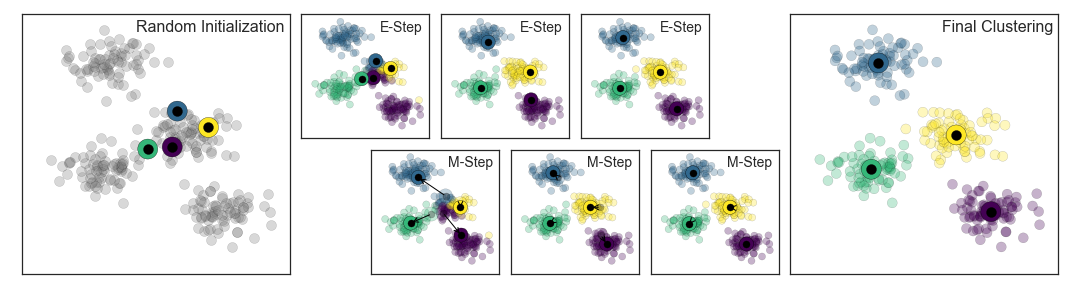

O algoritmo *k-Means* é simples o suficiente para que possamos escrevê-lo em algumas linhas de código.

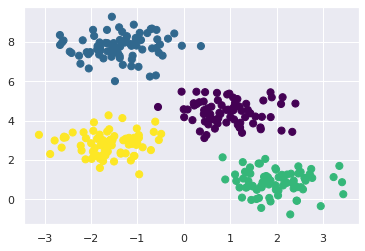

In [7]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

### Sobre a maximização de expectativa:

Existem algumas questões a serem observadas ao usar o algoritmo de maximização de expectativa.

#### O resultado global ideal pode não ser alcançado

Primeiro, embora seja garantido que o procedimento E-M melhore o resultado em cada etapa, não há garantia de que levará à melhor solução *global*. Por exemplo, uma simples semente aleatória diferente em nosso procedimento geram as suposições iniciais que levarão a resultados ruins:

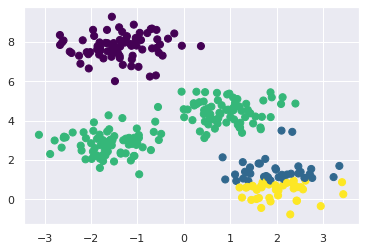

In [8]:
centers, labels = find_clusters(X, 4, rseed= 0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Aqui a abordagem E-M convergiu, mas não para uma configuração globalmente ótima. Por esse motivo, é comum que o algoritmo seja executado para múltiplas suposições iniciais, como de fato o Scikit-Learn faz por padrão (definido pelo parâmetro `n_init`, cujo valor padrão é 10).

#### O número de clusters deve ser selecionado previamente 

Outro desafio comum com *k-means* é que você deve informar quantos clusters você espera: ele não pode aprender o número de clusters a partir dos dados. Por exemplo, se pedirmos ao algoritmo para identificar seis clusters, ele prosseguirá e encontrará os seis melhores clusters:

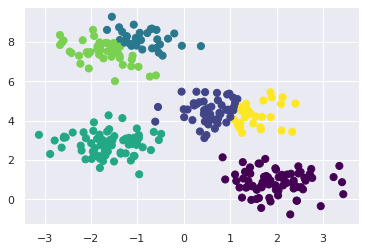

In [9]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Se o resultado é significativo é uma questão difícil de responder definitivamente; uma abordagem bastante intuitiva, mas que não discutiremos, é chamada de [análise de silhueta](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

Alternativamente, você pode usar um algoritmo de agrupamento mais complicado que tenha uma medida quantitativa melhor da aptidão por número de agrupamentos (por exemplo, modelos de mistura gaussiana) ou que possa escolher um número adequado de agrupamentos (por exemplo, DBSCAN, média móvel ou propagação de afinidade, todos disponíveis em `sklearn.cluster`)

#### *k-means* é limitado aos limites lineares do cluster 

As suposições fundamentais do modelo *k-means* (os pontos estarão mais próximos do centro do seu próprio cluster do que de outros) significam que o algoritmo será frequentemente ineficaz se os clusters tiverem geometrias complicadas.

Em particular, os limites entre clusters *k-means* serão sempre lineares, o que significa que falhará em limites mais 

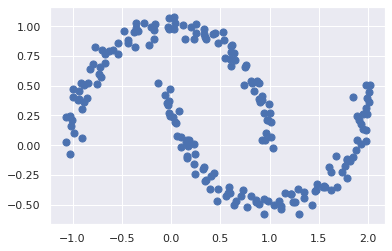

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis');

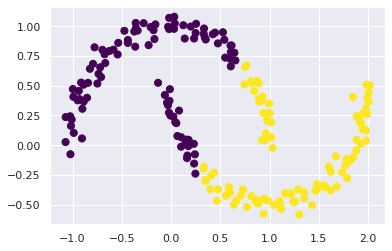

In [11]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Esta situação lembra a discussão sobre *Support Vector Machines*, onde usamos uma transformação de kernel para projetar os dados em uma dimensão superior onde uma separação linear era possível. Poderíamos imaginar usar o mesmo truque para permitir que *k-means* descubra limites não lineares.

Uma versão deste *k-means* "kernelizado" é implementada no Scikit-Learn dentro do estimador `SpectralClustering`. Ele usa um grafo de vizinhos mais próximos para calcular uma representação de dimensão superior dos dados e, em seguida, atribui rótulos usando um algoritmo *k-means*:

/home/paulodetarso/.local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


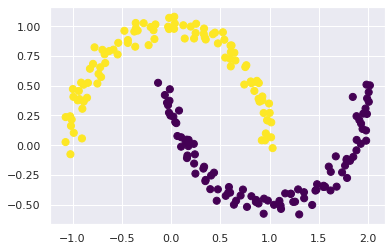

In [12]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Com esta abordagem de transformação de kernel, o *k-means* "kernelizado" é capaz de encontrar os limites não lineares mais complicados entre clusters.

#### *k-means* pode ser lento para um grande número de amostras 
Como cada iteração de *k-means* deve acessar todos os pontos do conjunto de dados, o algoritmo pode ser relativamente lento à medida que o número de amostras aumenta. Esse requisito de usar todos os dados em cada iteração pode ser relaxado; por exemplo, você pode usar apenas um subconjunto de dados para atualizar os centros de cluster em cada etapa. Esta é a ideia por trás dos algoritmos *k-means* baseados em lote, uma forma dos quais é implementada em `sklearn.cluster.MiniBatchKMeans`.

### Exemplos de aplicação do *k-means*

#### Exemplo 1: k-means em para descoberta de dígitos


Usaremos *k-means* para tentar identificar dígitos semelhantes; isso é semelhante a uma primeira etapa na extração de significado de um novo conjunto de dados sobre o qual você não possui nenhuma informação de rótulo *a priori*. Começaremos carregando os dígitos e depois encontrando os clusters *k-means*. 

Essa base de dados contém 1.797 amostras com 64 características, onde cada uma das 64 características é a intensidade de um pixel em uma imagem 8x8:

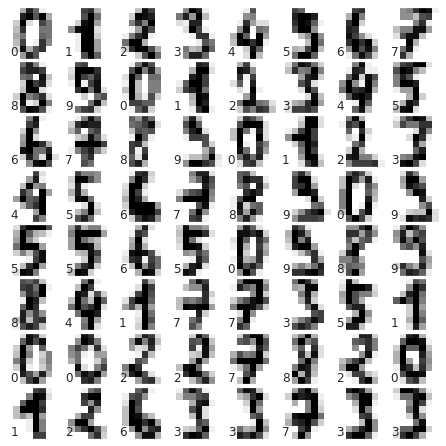

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

O algoritmo pode ser executado como fizemos antes.

In [14]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

O resultado são 10 clusters em 64 dimensões. Observe que os próprios centros do cluster são pontos de 64 dimensões e podem ser interpretados como o dígito "típico" dentro do cluster.

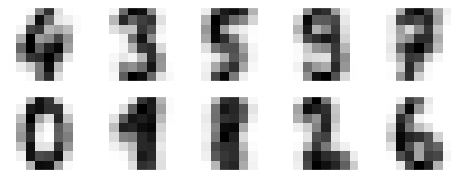

In [15]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Vemos que *mesmo sem os rótulos*, `KMeans` consegue encontrar clusters cujos centros são dígitos reconhecíveis, talvez com exceção do 1 e do 8.

Podemos combinar cada rótulo de cluster aprendido com os rótulos verdadeiros encontrados e verificar a eficácia do processo de aprendizado.

In [16]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Agora podemos verificar a acurácia do resultado do aprendizado não supervisionado em encontrar dígitos semelhantes nos dados:

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

Com apenas um algoritmo simples de *k-means*, descobrimos o agrupamento correto para 80% dos dígitos de entrada.

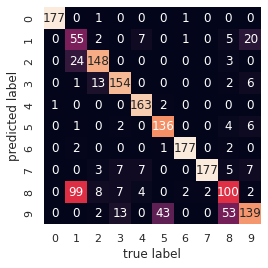

In [18]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Como poderíamos esperar dos centros de cluster que visualizamos antes, o principal ponto de confusão está entre os 8s e os 1s. Mas isso ainda mostra que usando *k-means*, podemos essencialmente construir um classificador de dígitos sem referência a nenhum rótulo conhecido.   

#### Exemplo 2: *k*-means para compressão de cores


Uma aplicação interessante de clusterização é a compressão de cores em imagens. Por exemplo, imagine que você tem uma imagem com milhões de cores. Na maioria das imagens, um grande número de cores não será utilizado e muitos pixels da imagem terão cores semelhantes ou até idênticas.

Por exemplo, considere a imagem mostrada na figura a seguir, que é do módulo `datasets ` Scikit-Learn.

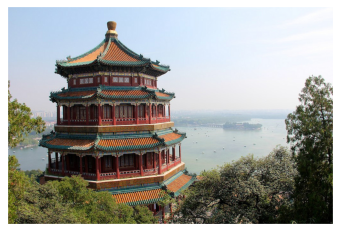

In [19]:
# Note: this requires the ``pillow`` package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

A imagem em si é armazenada em uma matriz tridimensional de tamanho `(height, width, RGB)`, contendo contribuições vermelho/azul/verde como números inteiros de 0 a 255:

In [20]:
china.shape

(427, 640, 3)

Uma forma de visualizar esse conjunto de pixels é como uma nuvem de pontos em um espaço de cores tridimensional. Vamos remodelar os dados para `[n_samples x n_features]` e redimensionar as cores para que fiquem entre 0 e 1.

In [21]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Podemos visualizar esses pixels neste espaço de cores, usando um subconjunto de 10.000 pixels.

In [22]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

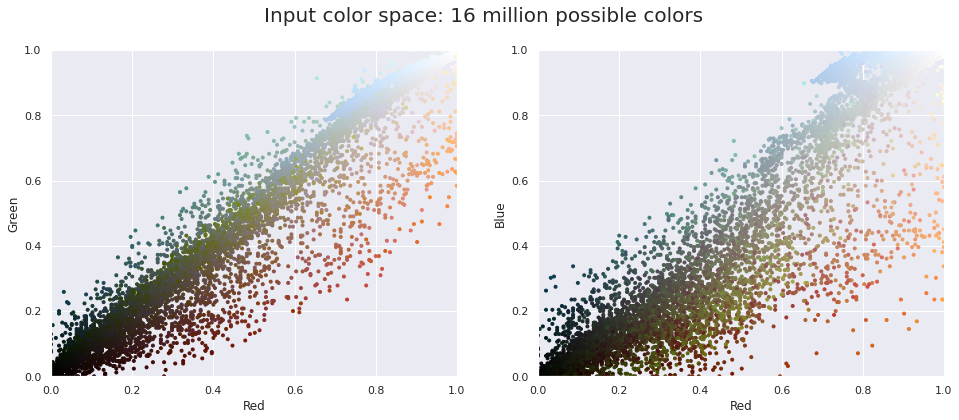

In [23]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Agora vamos reduzir esses 16 milhões de cores para apenas 16 cores, usando um agrupamento *k-means* no espaço de pixels. Como estamos lidando com um conjunto de dados muito grande, usaremos *k-means* em lotes, que opera em subconjuntos de dados para calcular o resultado muito mais rapidamente do que o algoritmo *k-means* padrão.

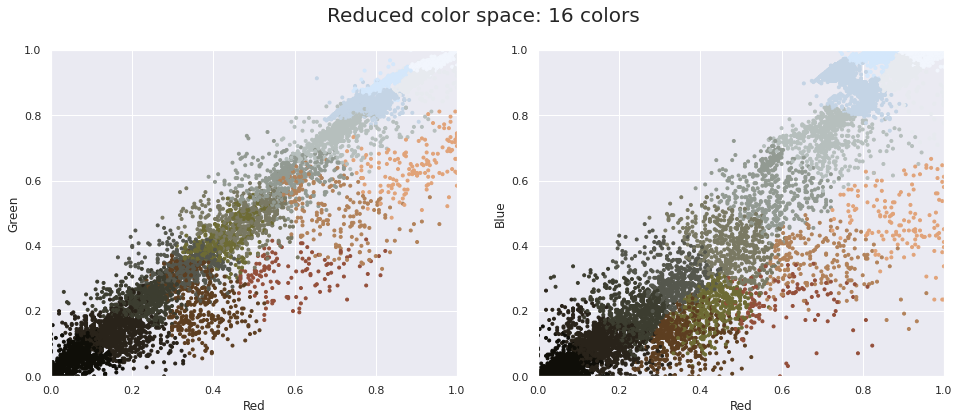

In [24]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

O resultado é uma nova coloração dos pixels originais, onde cada pixel recebe a cor do centro do cluster mais próximo. 

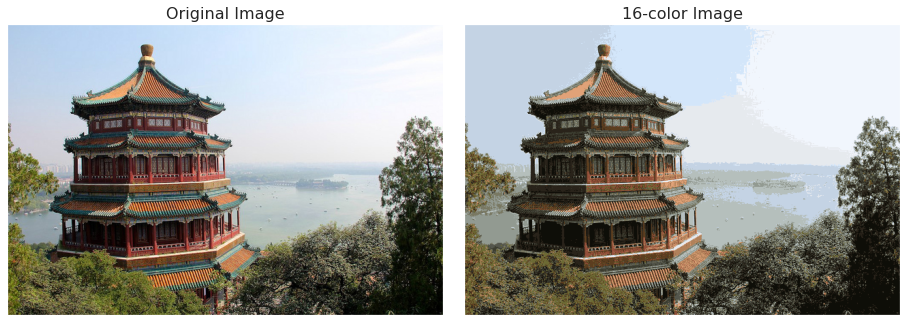

In [25]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

Alguns detalhes certamente são perdidos no painel mais à direita, mas a imagem geral ainda é facilmente reconhecível. 

Esta imagem à direita atinge um fator de compressão de cerca de 1 milhão. 

Embora esta seja uma aplicação interessante de k-means, certamente existem maneiras melhores de compactar informações em imagens. Mas o exemplo mostra o poder de pensar fora da caixa com métodos não supervisionados.

## Gaussian Mixture Models (GMM)


O *k-means* é simples e relativamente fácil de entender, mas sua simplicidade trás desafios práticos em sua aplicação. Em particular, a natureza não probabilística do *k-means* e seu uso da simples distância de um centróide para atribuir membros ao cluster levam a um desempenho insatisfatório em muitas situações do mundo real. 


In [26]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

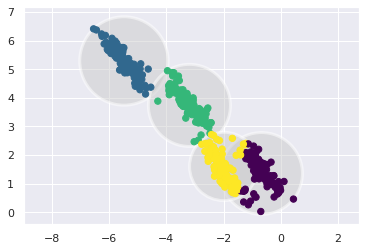

In [27]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)


Nesse sentido, o modelo de mistura gaussiana (Gaussian mixture model, GMMs) pode ser vistos como uma extensão das ideias por trás do *k-means*, sendo ainda uma ferramenta poderosa para estimativa além do simples agrupamento.

Um modelo de mistura gaussiana (GMM) tenta encontrar uma mistura de distribuições de probabilidade gaussianas multidimensionais que melhor modelem qualquer conjunto de dados de entrada. 



No caso mais simples, os GMMs podem ser usados ​​para encontrar clusters da mesma maneira que k -means:

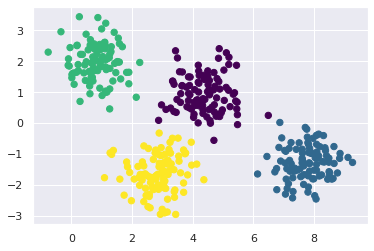

In [28]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

Como o GMM contém um modelo probabilístico subjacente, também é possível encontrar atribuições de cluster probabilístico – no Scikit-Learn isso é feito usando o método `predict_proba`. Isso retorna uma matriz de tamanho `[n_samples, n_clusters]` que mede a probabilidade de qualquer ponto pertencer a um determinado cluster:

In [29]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.537 0.463 0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]]


Podemos visualizar esta incerteza, por exemplo, tornando o tamanho de cada ponto proporcional à certeza da sua previsão; olhando para a figura a seguir, podemos ver que são precisamente os pontos nas fronteiras entre os clusters que refletem esta incerteza na atribuição dos clusters:

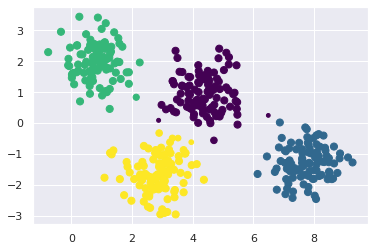

In [30]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

Um GMM é muito semelhante ao *k-means*: ele usa uma abordagem de maximização de expectativa que qualitativamente faz o seguinte:

1. Escolha as escolhas iniciais para locais e formas dos clusters
2. Repita até convergir:

   1. *E-step*: para cada ponto, encontre pesos que codificam a probabilidade de pertencimento a cada cluster;
   2. *M-step*: para cada cluster, atualize sua localização, normalização e formato com base em todos os pontos de dados, fazendo uso dos pesos.


O resultado disso é que cada cluster está associado não a uma círcuo com limites rígidos, mas a um modelo gaussiano suave. Assim como na abordagem de maximização de expectativa do *k-means*, este algoritmo pode às vezes perder a solução globalmente ótima, por isso, na prática, inicializações aleatórias são usadas.

In [31]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 2* 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

Podemos dar uma olhada no que o GMM de quatro componentes nos fornece para nossos dados iniciais:

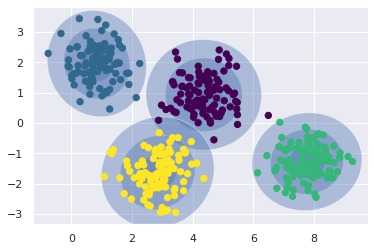

In [32]:
gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)

Da mesma forma, podemos usar a abordagem GMM para ajustar nosso conjunto de dados permitindo uma covariância completa, de modo que o modelo se ajustará até mesmo a clusters muito esticados:

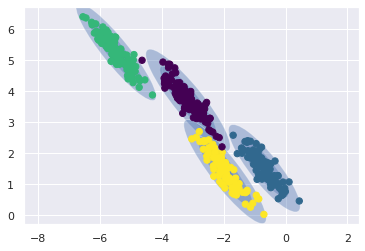

In [33]:
gmm = GMM(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

Observe que a opção `covariance_type` foi definida de forma diferente nos últimos exemplos. Este hiperparâmetro controla os graus de liberdade na forma de cada cluster. 

- O padrão é `covariance_type="diag"`, o que significa que o tamanho do cluster ao longo de cada dimensão pode ser definido de forma independente, com a elipse resultante restrita para se alinhar aos eixos. 

- Um modelo um pouco mais simples e rápido é o `covariance_type="spherical"`, que restringe a forma do cluster de modo que todas as dimensões sejam iguais. O agrupamento resultante terá características semelhantes às do *k-means*, embora não seja totalmente equivalente. 

- Um modelo mais complicado e computacionalmente caro (especialmente à medida que o número de dimensões aumenta) é usar `covariance_type="full"`, que permite que cada cluster seja modelado como uma elipse com orientação arbitrária.

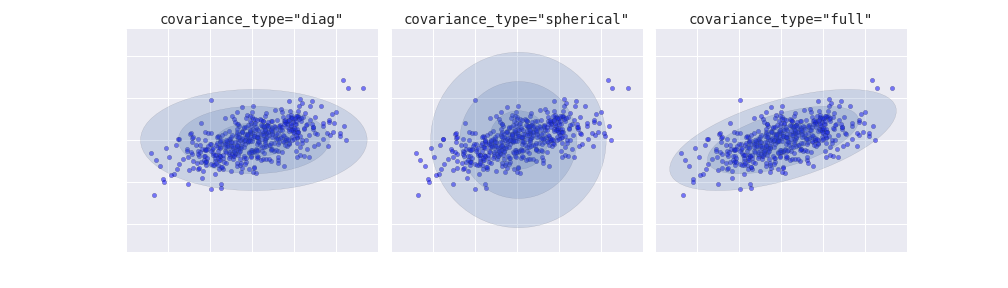

### GMM como estimativa de densidade


Embora o GMM seja frequentemente categorizado como um algoritmo de agrupamento, fundamentalmente é um algoritmo para *estimativa de densidade*. 
Ou seja, o resultado de um GMM ajustado a alguns dados não é tecnicamente um modelo de agrupamento, mas um modelo probabilístico generativo que descreve a distribuição dos dados.

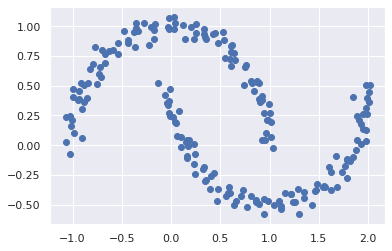

In [34]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

Se tentarmos ajustar isto a um GMM de dois componentes visto como um modelo de agrupamento, os resultados não serão particularmente úteis:

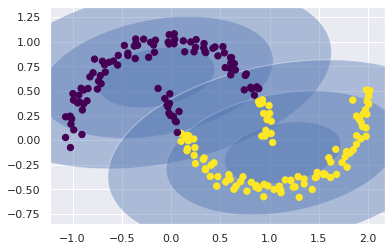

In [35]:
gmm2 = GMM(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

Se usarmos muito mais componentes e ignorarmos os rótulos dos clusters, encontraremos um ajuste que está muito mais próximo dos dados de entrada:

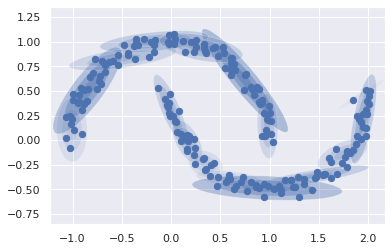

In [36]:
gmm16 = GMM(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

Aqui a mistura de 16 gaussianas não serve para encontrar grupos separados de dados, mas sim para modelar a distribuição global dos dados de entrada. 

Este é um modelo generativo de distribuição, o que significa que o GMM nos dá a receita para gerar novos dados aleatórios distribuídos de forma semelhante à nossa entrada. 


Por exemplo, aqui estão 400 novos pontos extraídos deste ajuste do GMM de 16 componentes aos nossos dados originais:

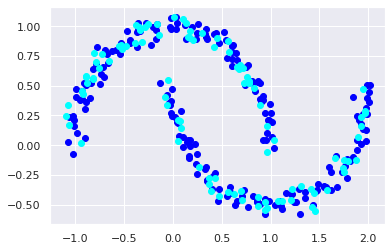

In [37]:
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], color='blue');
Xnew,_ = gmm16.sample(100)
plt.scatter(Xnew[:, 0], Xnew[:, 1], color='cyan');

O GMM é útil como um meio flexível de modelar uma distribuição multidimensional arbitrária de dados.

O fato de o GMM ser um modelo generativo nos dá um meio natural de determinar o número ideal de componentes para um determinado conjunto de dados. 
Um modelo generativo é inerentemente uma distribuição de probabilidade para o conjunto de dados e, portanto, podemos simplesmente avaliar a probabilidade dos dados no modelo, usando validação cruzada para evitar *overfitting*. 



Outra forma de corrigir o sobreajuste é ajustar as probabilidades do modelo usando algum critério analítico, como o [Akaike information criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion) ou o [Bayesian information criterion (BIC)](https://en.wikipedia.org/wiki/Bayesian_information_criterion). O estimador do Scikit-Learn `GaussianMixture` possui métodos que calculam ambos e, portanto, é muito fácil operar com essa abordagem.

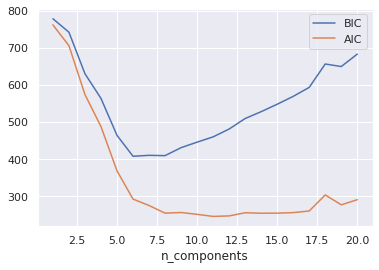

In [38]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(Xmoon)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

## Kernel Density Estimation (KDE)

Um estimador de densidade é um algoritmo que busca modelar a distribuição de probabilidade que gerou um conjunto de dados.

Para dados unidimensionais, temos um estimador de densidade simples: *o histograma*. 
Um histograma divide os dados em compartimentos, conta o número de pontos que caem em cada compartimento e, em seguida, visualiza os resultados de maneira intuitiva.

In [39]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

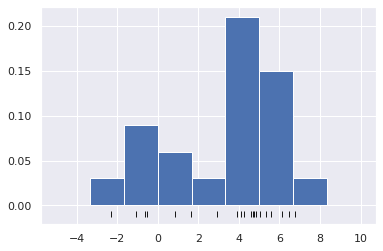

In [40]:
x = make_data(20)
bins = np.linspace(-5, 10, 10) # 10 bins

plt.hist(x, bins=bins, density=True);
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1);


Um dos problemas do uso de um histograma como estimador de densidade é que a escolha do tamanho e localização do compartimento pode levar a representações com características qualitativamente diferentes.

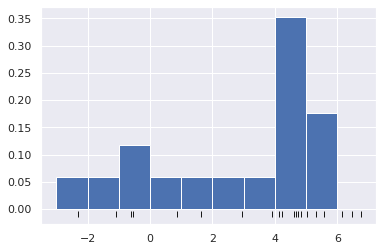

In [41]:
x = make_data(20)
bins = np.linspace(-5, 10, 10) # 10 bins

plt.hist(x, bins=bins*0.6, density=True);
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1);


O ponto é que costumamos pensar em um histograma como uma pilha de blocos, onde empilhamos um bloco dentro de cada compartimento no topo de cada ponto do conjunto de dados.

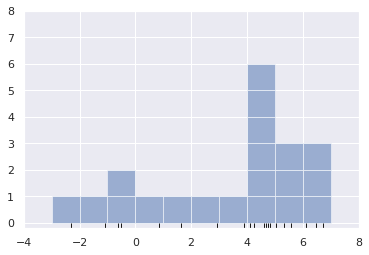

In [42]:
bins = np.arange(-3, 8)

fig, ax = plt.subplots()
ax.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1, alpha=0.5))
ax.set_xlim(-4, 8); 
ax.set_ylim(-0.2, 8);

O problema com esse agrupamento vem do fato de que a altura da pilha de blocos geralmente reflete não na densidade real dos pontos próximos, mas nas coincidências de como os compartimentos se alinham com os pontos de dados. Este desalinhamento entre os pontos e seus blocos é uma causa potencial dos maus resultados de histogramas. 


Se em vez de empilharmos os blocos alinhados com as *caixas*, somássemos suas contribuições em cada local ao longo do eixo x poderiamos encontrar o resultado relativo a densidade de sua distribuição.

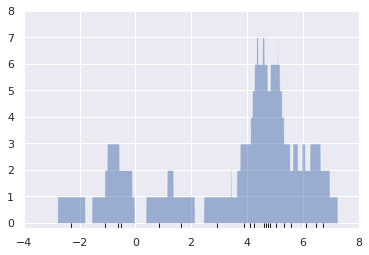

In [43]:
x_d = np.linspace(-4, 8, 2000)
density = sum([(abs(xi - x_d) < 0.5) for xi in x])

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 8]);

O resultado parece um pouco confuso, mas é um reflexo muito mais próximo das características reais dos dados do que o histograma padrão. 

Para suavizá-los, podemos substituir os blocos em cada local por uma função suave, como uma Gaussiana. Vamos usar uma curva normal padrão em cada ponto em vez de um bloco:

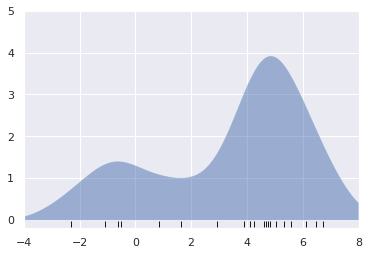

In [44]:
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 5]);

### Exemplo de uso de Kernel Density Estimation


Os parâmetros livres de estimativa de densidade do kernel são o `kernel`, que especifica a forma da distribuição colocada em cada ponto, e `bandwidth`, a largura de banda do kernel, que controla o tamanho do kernel em cada ponto. 

No Scikit-Learn, o KDE é implementado no módulo `KernelDensityestimador`, que lida com o KDE em múltiplas dimensões usando um de seis kernels e uma entre algumas dezenas de métricas de distância. 



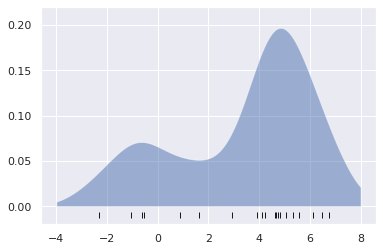

In [68]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22);

A escolha do valor de *bandwidth* é extremamente importante para encontrar uma estimativa de densidade adequada: um valor pequeno leva a uma estimativa de alta variância (*overfitting*), onde a presença ou ausência de um único ponto faz uma grande diferença; um valor muito alto leva a uma estimativa de alta polarização (*underfitting*), onde a estrutura dos dados não é capturada pelo kernel amplo.

Em contextos de aprendizado de máquina, esse ajuste de hiperparâmetros geralmente é feito empiricamente por meio de uma abordagem de validação cruzada. Usaremos `GridSearchCV` para otimizar a largura de banda do conjunto de dados. 

In [70]:
from sklearn.model_selection import GridSearchCV, KFold

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths}, cv=KFold(len(x)))
grid.fit(x[:, None]);

Agora podemos encontrar a escolha da largura de banda que maximiza a pontuação:

In [71]:
grid.best_params_

{'bandwidth': 1.1233240329780276}

A largura de banda ideal é muito próxima daquela que usamos no gráfico de exemplo anterior, onde a largura de banda era 1,0.

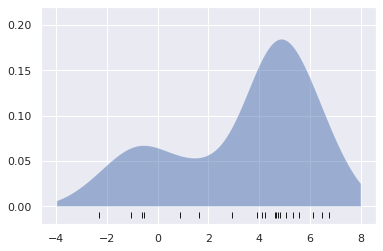

In [72]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=grid.best_params_['bandwidth'], kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22);

### Exemplo de aplicação do KDE em dados geográficos


Talvez o uso mais comum do KDE seja na representação gráfica de distribuições de pontos. Por exemplo, na biblioteca de visualização [Seaborn](https://seaborn.pydata.org/), o KDE é usado nativamente para ajudar a visualizar pontos em uma e duas dimensões.



Aqui faremos uso de alguns dados geográficos que podem ser carregados com o Scikit-Learn: as distribuições geográficas de observações registradas de dois mamíferos sul-americanos, *Bradypus variegatus* (a preguiça-de-garganta-marrom) e *Microryzomys minutus* (o pequeno rato do arroz da floresta).

In [76]:
from sklearn.datasets import fetch_species_distributions

data = fetch_species_distributions()

# Get matrices/arrays of species IDs and locations
latlon = np.vstack([data.train['dd lat'], data.train['dd long']]).T
species = np.array([d.decode('ascii').startswith('micro') for d in data.train['species']], dtype='int')

Com esses dados carregados, podemos usar *Basemap toolkit* para traçar as localizações observadas dessas duas espécies no mapa da América do Sul.

In [50]:
%pip install basemap -q
from mpl_toolkits.basemap import Basemap

def construct_grids(batch):
    # x,y coordinates for corner cells
    xmin = batch.x_left_lower_corner + batch.grid_size
    xmax = xmin + (batch.Nx * batch.grid_size)
    ymin = batch.y_left_lower_corner + batch.grid_size
    ymax = ymin + (batch.Ny * batch.grid_size)

    # x coordinates of the grid cells
    xgrid = np.arange(xmin, xmax, batch.grid_size)
    # y coordinates of the grid cells
    ygrid = np.arange(ymin, ymax, batch.grid_size)

    return (xgrid, ygrid)

Note: you may need to restart the kernel to use updated packages.


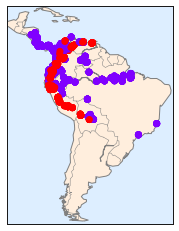

In [77]:
xgrid, ygrid = construct_grids(data)

# plot coastlines with basemap
m = Basemap(projection='cyl', resolution='c', llcrnrlat=ygrid.min(), urcrnrlat=ygrid.max(), llcrnrlon=xgrid.min(), urcrnrlon=xgrid.max())
m.drawmapboundary(fill_color='#DDEEFF')
m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='gray', zorder=2)
m.drawcountries(color='gray', zorder=2)

# plot locations
m.scatter(latlon[:, 1], latlon[:, 0], zorder=3, c=species, cmap='rainbow', latlon=True);

Infelizmente, isto não dá uma ideia muito boa da densidade das espécies, porque pontos na distribuição das espécies podem sobrepor-se uns aos outros. Neste gráfico há mais de 1.600 pontos sendo exibidos.

Vamos usar a estimativa de densidade do kernel para mostrar esta distribuição de uma forma mais interpretável: como uma indicação suave de densidade no mapa. 

Como o sistema de coordenadas é dado sobre uma superfície esférica e não em um plano, usaremos a métrica de distância [`haversine`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.haversine_distances.html), que representará corretamente as distâncias em uma superfície curva.

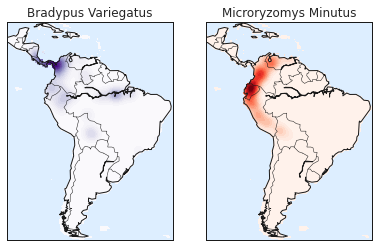

In [78]:
# Set up the data grid for the contour plot
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()
xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = np.radians(xy[land_mask])

# Create two side-by-side plots
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)
species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']
cmaps = ['Purples', 'Reds']

for i, axi in enumerate(ax):
    axi.set_title(species_names[i])
    
    # plot coastlines with basemap
    m = Basemap(projection='cyl', llcrnrlat=Y.min(),
                urcrnrlat=Y.max(), llcrnrlon=X.min(),
                urcrnrlon=X.max(), resolution='c', ax=axi)
    m.drawmapboundary(fill_color='#DDEEFF')
    m.drawcoastlines()
    m.drawcountries()
    
    # construct a spherical kernel density estimate of the distribution
    kde = KernelDensity(bandwidth=0.03, metric='haversine')
    kde.fit(np.radians(latlon[species == i]))

    # evaluate only on the land: -9999 indicates ocean
    Z = np.full(land_mask.shape[0], -9999.0)
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    axi.contourf(X, Y, Z, levels=levels, cmap=cmaps[i])

Em comparação com o gráfico de dispersão simples que utilizámos inicialmente, esta visualização mostra uma imagem muito mais clara da distribuição geográfica das observações destas duas espécies.

## Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

O algoritmo DBSCAN vê os clusters como áreas de alta densidade separadas por áreas de baixa densidade. Devido a esta visão bastante genérica, os clusters encontrados pelo DBSCAN podem ter qualquer formato, ao contrário do *k-means*, que assume que os clusters têm formato convexo. 

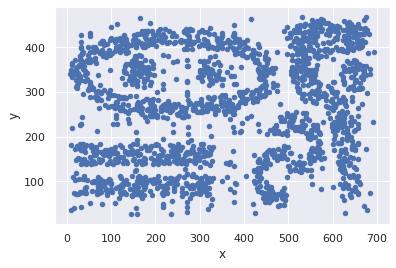

O componente central do DBSCAN é o conceito de amostras núcleo (*core examples*), que são amostras que estão em áreas de alta densidade. Um cluster é, portanto, um conjunto de amostras principais, cada uma próxima uma da outra (medida por alguma medida de distância) e um conjunto de amostras não essenciais que estão próximas de uma amostra principal (mas que não são amostras principais).

Existem dois parâmetros no algoritmo, `min_samples` e `eps`, que definem formalmente o que queremos dizer quando dizemos denso. Maior `min_samples` ou menor `eps` indica maior densidade necessária para formar um cluster.

Formalmente, definimos uma amostra principal como sendo uma amostra no conjunto de dados tal que existem `min_samples` outras amostras dentro de uma distância de `eps`, que são definidas como vizinhas da amostra principal. Isso nos diz que a amostra central está em uma área densa do espaço vetorial. 

Um cluster é um conjunto de amostras principais que pode ser construído coletando recursivamente uma amostra principal, encontrando todos os seus vizinhos que são amostras principais, encontrando todos os seus vizinhos que são amostras principais e assim por diante. 

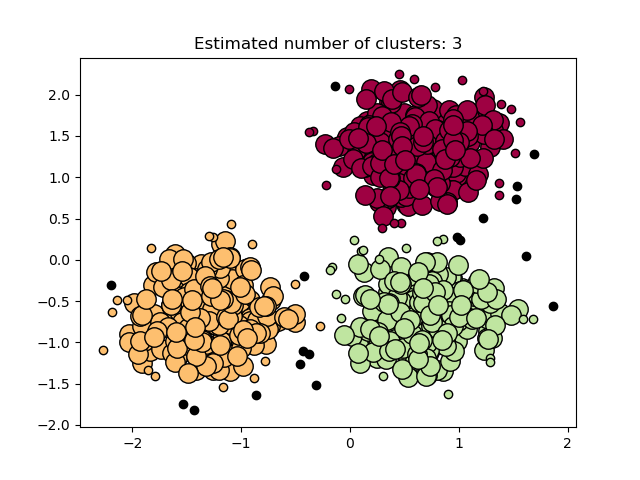

Um cluster também possui um conjunto de amostras não essenciais, que são amostras vizinhas de uma amostra principal no cluster, mas não são amostras principais. Intuitivamente, essas amostras estão à margem de um cluster.

Qualquer amostra principal faz parte de um cluster, por definição. Qualquer amostra que não seja uma amostra principal e esteja pelo menos `eps` distante de qualquer amostra principal é considerada um `outlier` pelo algoritmo.

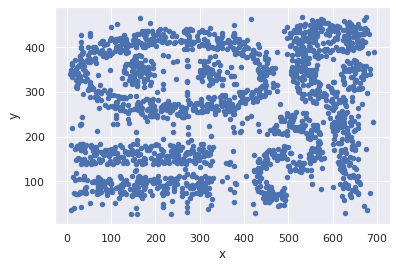

In [79]:
import pandas as pd
chameleon_data = 'http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial8/chameleon.data'
data = pd.read_csv(chameleon_data, delimiter=' ', names=['x','y'])
data.plot.scatter(x='x',y='y');

Aplicamos o algoritmo `DBSCAN` nos dados definindo o raio da vizinhança (`eps`) como 15.5 e o número mínimo de pontos (`min_samples`) como 5. Os clusters são atribuídos IDs entre 0 a 8 enquanto os pontos *outliers* são atribuídos um cluster ID com valor -1.

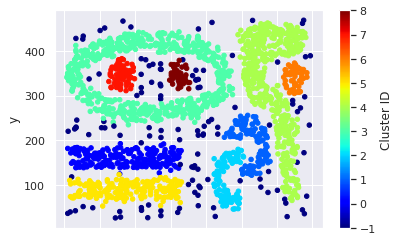

In [91]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15.5, min_samples=5).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet');

DBSCAN encontra amostras centrais de alta densidade e expande clusters a partir delas. Este algoritmo é bom para dados que contêm clusters de densidade semelhante.

O pior caso de complexidade de memória do DBSCAN é $O(n^2)$, que pode ocorrer quando o parâmetro `eps` é grande e `min_samples` é baixo.

## Comparativo entre os algoritmos de clusterização do Scikit-learn

In [55]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

def plot_clustering_algorithms_comparison():
    # ============
    # Generate datasets. We choose the size big enough to see the scalability
    # of the algorithms, but not too big to avoid too long running times
    # ============
    n_samples = 500
    seed = 30

    noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed)
    noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
    blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
    rng = np.random.RandomState(seed)
    no_structure = rng.rand(n_samples, 2), None

    # Anisotropicly distributed data
    random_state = 170
    X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    X_aniso = np.dot(X, transformation)
    aniso = (X_aniso, y)

    # blobs with varied variances
    varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

    # ============
    # Set up cluster parameters
    # ============
    plt.figure(figsize=(9 * 2 + 3, 13))
    plt.subplots_adjust(
        left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
    )

    plot_num = 1

    default_base = {
        "quantile": 0.3,
        "eps": 0.3,
        "n_clusters": 3,
        "random_state": 42,
    }

    datasets_list = [
        (noisy_circles, {"damping": 0.77,"preference": -240,"quantile": 0.2,"n_clusters": 2,"min_samples": 7,"xi": 0.08,}),
        (noisy_moons, {"damping": 0.75,"preference": -220,"n_clusters": 2,"min_samples": 7,"xi": 0.1,}),
        (varied, {"eps": 0.18,"n_neighbors": 2,"min_samples": 7,"xi": 0.01,"min_cluster_size": 0.2,}),
        (aniso, {"eps": 0.15,"n_neighbors": 2,"min_samples": 7,"xi": 0.1,"min_cluster_size": 0.2,}),
        (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
        (no_structure, {}),
    ]

    for i_dataset, (dataset, algo_params) in enumerate(datasets_list):
        # update parameters with dataset-specific values
        params = default_base.copy()
        params.update(algo_params)

        X, y = dataset

        # normalize dataset for easier parameter selection
        X = StandardScaler().fit_transform(X)

        # estimate bandwidth for mean shift
        bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

        # ============
        # Create cluster objects
        # ============
        ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
        two_means = cluster.MiniBatchKMeans(
            n_clusters=params["n_clusters"],
            n_init=3,
            random_state=params["random_state"],
        )
        spectral = cluster.SpectralClustering(
            n_clusters=params["n_clusters"],
            eigen_solver="arpack",
            affinity="nearest_neighbors",
            random_state=params["random_state"],
        )
        gmm = mixture.GaussianMixture(
            n_components=params["n_clusters"],
            covariance_type="full",
            random_state=params["random_state"],
        )
        dbscan = cluster.DBSCAN(eps=params["eps"])

        clustering_algorithms = (
            ("KMeans", two_means),
            ("Spectral\nClustering", spectral),
            ("Gaussian\nMixture", gmm),
            ("DBSCAN", dbscan),
        )

        for name, algorithm in clustering_algorithms:

            t0 = time.time()

            # catch warnings related to kneighbors_graph
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore", message="the number of connected components of the connectivity matrix is [0-9]{1,2} > 1. Completing it to avoid stopping the tree early.", category=UserWarning)
                warnings.filterwarnings("ignore", message="Graph is not fully connected, spectral embedding may not work as expected.", category=UserWarning)
                algorithm.fit(X)

            t1 = time.time()

            if hasattr(algorithm, "labels_"):
                y_pred = algorithm.labels_.astype(int)
            else:
                y_pred = algorithm.predict(X)

            plt.subplot(len(datasets_list), len(clustering_algorithms), plot_num)
            if i_dataset == 0:
                plt.title(name, size=18)

            colors = np.array(list(islice(cycle(["#377eb8","#ff7f00","#4daf4a","#f781bf","#a65628","#984ea3","#999999","#e41a1c","#dede00",]), int(max(y_pred) + 1))))

            # add black color for outliers (if any)
            colors = np.append(colors, ["#000000"])
            plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

            plt.xlim(-2.5, 2.5)
            plt.ylim(-2.5, 2.5)
            plt.xticks(())
            plt.yticks(())
            plt.text(0.99,0.01,("%.2fs" % (t1 - t0)).lstrip("0"),transform=plt.gca().transAxes,size=15,horizontalalignment="right")
            plot_num += 1

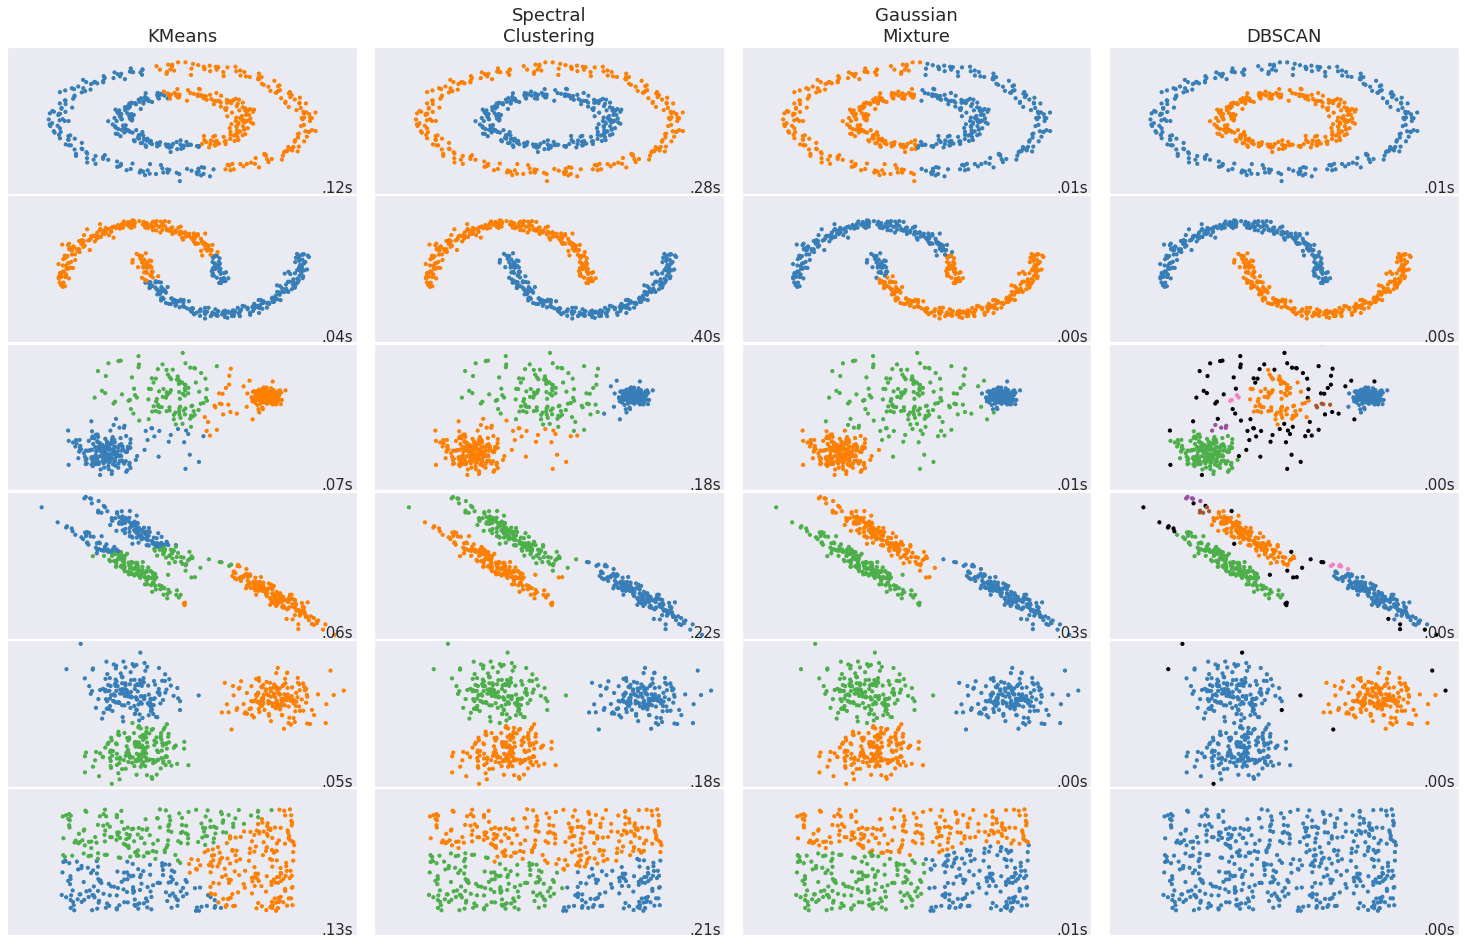

In [56]:
plot_clustering_algorithms_comparison()